# <center> Evolutionary Programming applied to find the minimum of the Adjiman Function <center>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d 
import random
import math
%matplotlib inline

# 0.) Adjiman Function

In [2]:
xmin = 2
ymin = 0.10578
# xmin = 3
# ymin = 2
def adjiman(x1,x2):
    z =  (np.cos(x1) * np.sin(x2)) - ( x1 / (np.power(x2,2) + 1) )
    # z = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
    return (z)

In [3]:
zmin = adjiman(xmin, ymin)
print(f'Minimum point: \n x = {xmin} \n y = {ymin} \n z = {zmin}')

Minimum point: 
 x = 2 
 y = 0.10578 
 z = -2.0218067833370204


# 1.) Contour lines

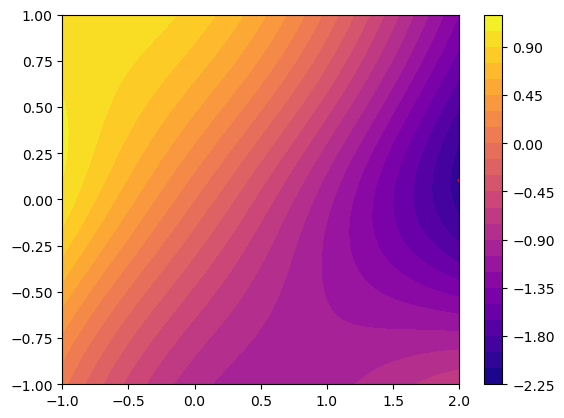

In [4]:
x1 = np.arange(-1,
               2.1,
               0.01)

x2= np.arange(-1,
              1,
              0.01)

x1mesh, x2mesh = np.meshgrid(x1,x2)
zmesh = (np.cos(x1mesh) * np.sin(x2mesh)) - ( x1mesh/ (np.power(x2mesh,2) + 1) )
# zmesh = (x1mesh**2 + x2mesh - 11)**2 + (x1mesh + x2mesh**2 - 7)**2


contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
plt.xlim((-1, 2))
plt.ylim((-1, 1))
plt.scatter(xmin, ymin, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)

# 2.) 3D Graphic 

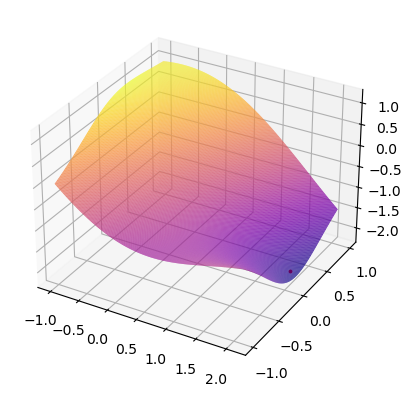

In [5]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(x1mesh, x2mesh, zmesh,
                cmap = 'plasma', alpha = 0.95, antialiased = True, shade = True,
               rstride=1, cstride=1)
ax.scatter(xmin, ymin, zmin, color = 'red', marker = 'o', s = 3)

# 3.) Initial Population

In [6]:
def InitialPopulation(N_individuos, N_variables):
    PI = np.zeros((N_individuos,2*N_variables + 1)) # Initialize the Initial Population Matrix
    for i in range (N_individuos):
        x1 = np.random.uniform(low = -1, high = 2, size = 1)
        x2 = np.random.uniform(low = -1, high = 1, size = 1)
        eta1 = np.random.uniform(low = -0.1, high = 0.1, size = 1)
        eta2 = np.random.uniform(low = -0.1, high = 0.1, size = 1)
        f = adjiman(x1,x2)
        PI[i,0] = x1
        PI[i,1] = x2
        PI[i,2] = eta1
        PI[i,3] = eta2
        PI[i,4] = f
    return (PI)

# 4.) Mutated Population

\begin{align}
    x_{i}^{'} (j) & = x_{i}(j) + \eta_{i} (j) N_{j} (0,1) \\
    \eta_{i}^{'} (j) & = \eta_{i} (j) exp(\tau^{'} N(0,1) + \tau N_{j} (0,1))
\end{align}
where
\begin{align}
    \tau & = (\sqrt{2 \sqrt{n}})^{-1} \\
    \tau^{'} & = (\sqrt{2n})^{-1}
\end{align}

In [7]:
def MutatedPopulation(N_individuos, N_variables, P):
    PM = np.zeros((N_individuos, 2*N_variables + 1)) # Initialize the Mutated Population Matrix
    Tao = np.power( np.sqrt(2 * np.sqrt(N_variables)), -1 ) # Declarate tau
    Tao_p = np.power( np.sqrt(2 * N_variables), -1 ) # Declarate tau prima
    for i in range (N_individuos):
        # Mutation for x1 and eta1
        N = np.random.normal(loc = 0, scale = 1, size = 1)
        Nj = np.random.normal(loc = 0, scale = 1, size = 1)
        x1_p = PI[i,0] + PI[i,2] * Nj
        eta1_p =  PI[i,2] * math.exp(Tao_p * N + Tao * Nj)
        PM[i,0] = x1_p
        PM[i,2] = eta1_p
        # Mutation for x2 and eta2
        N = np.random.normal(loc = 0, scale = 1, size = 1)
        Nj = np.random.normal(loc = 0, scale = 1, size = 1)
        x2_p = PI[i,1] + PI[i,3] * Nj
        eta2_p =  PI[i,3] * math.exp(Tao_p * N + Tao * Nj)
        PM[i,1] = x2_p
        PM[i,3] = eta2_p
        # Fitness mutated  population
        f_mutated = adjiman(x1_p,x2_p)
        PM[i,4] = f_mutated
    return (PM)

# 5.) Tournament 

In [8]:
def Tournament(N_individuos, N_variables, T_Torneo, P, PM):
    T = np.zeros((2*N_individuos, 2*N_variables + 2)) # Initialize the Tournament Matrix
    T[0:N_individuos, 0 : (2*N_variables + 1)] = P # Half of Matrix T is the Initial Population
    T[(N_individuos) : (2*N_individuos), 0 : (2*N_variables + 1)] = PM # The other half of T is the Mutated Population
    win = 2*N_variables + 1
    fitness = 2*N_variables
    
    for t in range (T_Torneo):
        for i in range (2*N_individuos):
            boxer1 = i
            boxer2 = math.floor(np.random.uniform(low = 1, high = 2*N_individuos, size = 1))
            if (T[boxer1, fitness] <= T[boxer2, fitness]):
                T[boxer1, win] = T[boxer1, win] + 1
            else:
                T[boxer2, win] = T[boxer2, win] + 1
    return (T)

# 6.) Selection
Using Bubble Sort Method for order the T Matrix

In [9]:
def Selection(N_individuos, N_variables, T):
    PS = np.zeros((N_individuos, 2*N_variables + 1))
    win = 2*N_variables + 1
    rows = 2*N_individuos
    for k in range (rows):
        for i in range (0, rows-1):
            if ( T[i,win] < T[i + 1, win] ):
               # aux = T[i, :] # Save the row with bigger number
                T[i, :], T[i + 1, :] = T[i + 1, :].copy(), T[i, :].copy() # Swap
    PS = T[0:N_individuos, 0:2*N_variables + 1]
    return (PS)

# 7.) Generating the Initial Population

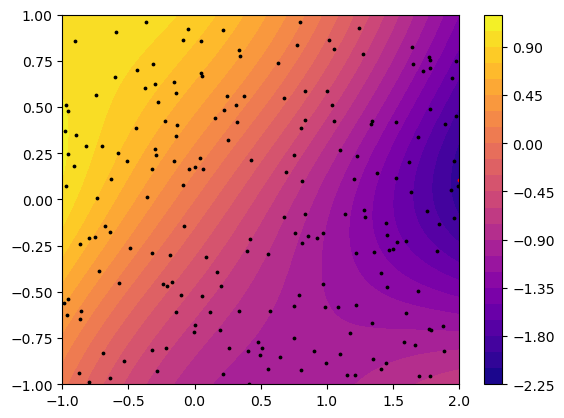

In [10]:
N_individuos = 200
N_variables = 2
N_generaciones = 500
PI = InitialPopulation(N_individuos, N_variables)
P = PI
StatsEval = np.zeros((N_generaciones + 1, 5)) # k, min, max, mean, std
StatsEval[0,:] = [0, np.min(P[:,4]), np.max(P[:,4]), np.mean(P[:,4]), np.std(P[:,4])]
contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
plt.xlim((-1, 2))
plt.ylim((-1, 1))
plt.scatter(xmin, ymin, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)
plt.scatter(PI[:,0], PI[:,1], color = 'black', marker = 'o', s = 3)

# 8.) Ciclo

In [11]:
T_Torneo = 20
for k in range (N_generaciones):
    PM = MutatedPopulation(N_individuos, N_variables, P)
    T = Tournament(N_individuos, N_variables, T_Torneo, P, PM)
    PS = Selection(N_individuos, N_variables, T)  
    P = PS
    StatsEval[k+1,:] = [k+1, np.min(P[:,4]), np.max(P[:,4]), np.mean(P[:,4]), np.std(P[:,4])]

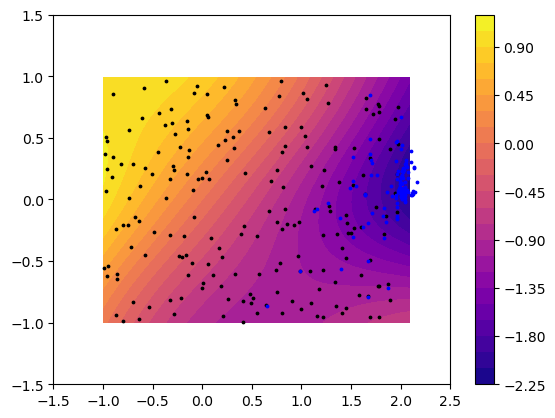

In [12]:
contour1 = plt.contourf(x1mesh, x2mesh, zmesh,  levels=25, cmap = 'plasma')
plt.xlim((-1.5, 2.5))
plt.ylim((-1.5, 1.5))
plt.scatter(xmin, ymin, color = 'red', marker = 'o', s = 3)
plt.colorbar(contour1)
plt.scatter(PI[:,0], PI[:,1], color = 'black', marker = 'o', s = 3)
plt.scatter(P[:,0], P[:,1], color = 'blue', marker = 'o', s = 3)

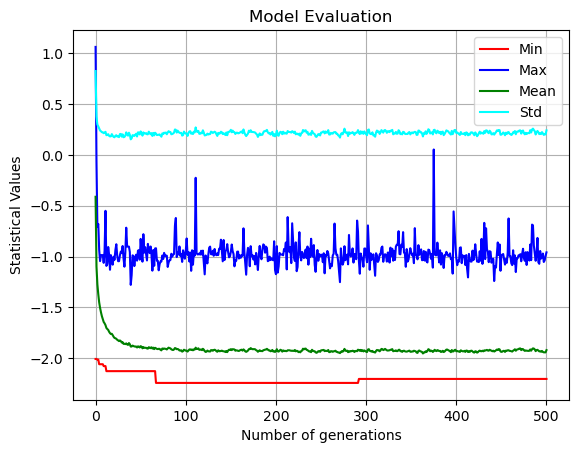

In [13]:
plt.plot(StatsEval[:,0], StatsEval[:,1], color = 'red', label = 'Min'  )
plt.plot(StatsEval[:,0], StatsEval[:,2], color = 'blue', label = 'Max' )
plt.plot(StatsEval[:,0], StatsEval[:,3], color = 'green', label = 'Mean' )
plt.plot(StatsEval[:,0], StatsEval[:,4], color = 'cyan', label = 'Std' )
plt.legend()
plt.xlabel('Number of generations')
plt.ylabel('Statistical Values')
plt.title('Model Evaluation')
plt.grid()
plt.show()